<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing\_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


***


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [16]:
# andas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [17]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

df.describe()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude,Class
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,6104.959412,1.788889,3.500000,1.655556,-86.366477,29.449963,0.666667
std,26.124701,4694.671720,1.213172,1.595288,1.710254,14.149518,2.141306,0.474045
min,1.000000,350.000000,1.000000,1.000000,0.000000,-120.610829,28.561857,0.000000
25%,23.250000,2510.750000,1.000000,2.000000,0.000000,-80.603956,28.561857,0.000000
50%,45.500000,4701.500000,1.000000,4.000000,1.000000,-80.577366,28.561857,1.000000
75%,67.750000,8912.750000,2.000000,5.000000,3.000000,-80.577366,28.608058,1.000000
max,90.000000,15600.000000,6.000000,5.000000,5.000000,-80.577366,34.632093,1.000000


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


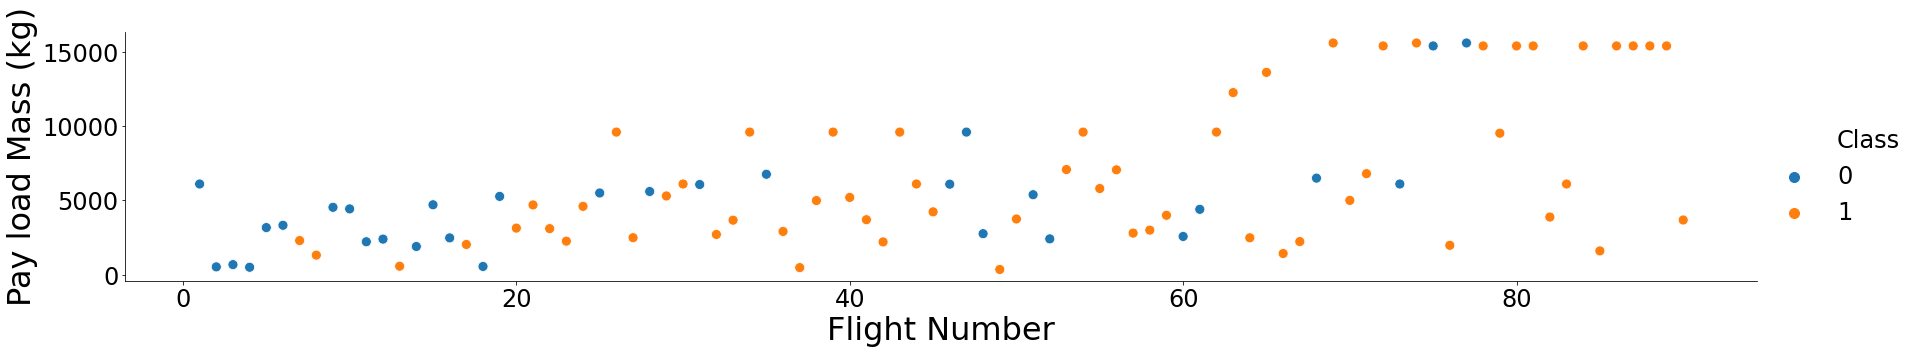

In [18]:
plt.rcParams.update({'font.size': 24})
plt.rcParams.update({'lines.markersize': 10})
sns.relplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=32)
plt.ylabel("Pay load Mass (kg)",fontsize=32)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


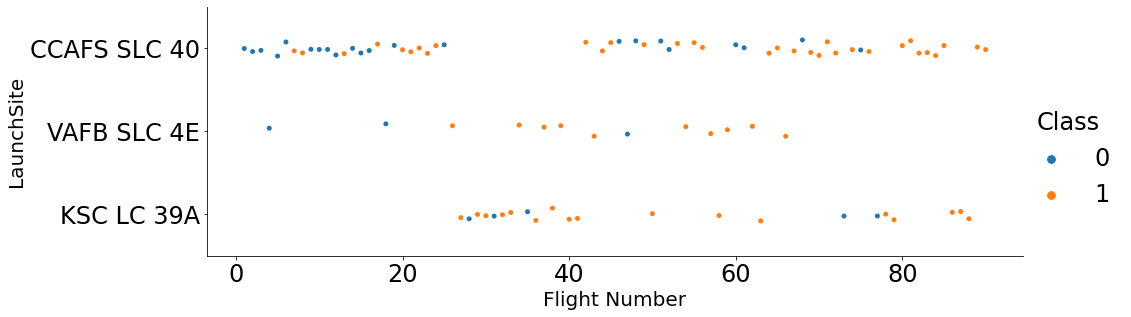

In [19]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 3)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

* #### The scatter plot of Launch Site vs Flight Number, which is equivalent to time, shows that the success rate increases with time. Additionally, it can be seen that CCAFS SLC 40 launch site does not have as good a success rate as the other two launch sites.

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


### TASK 2: Visualize the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


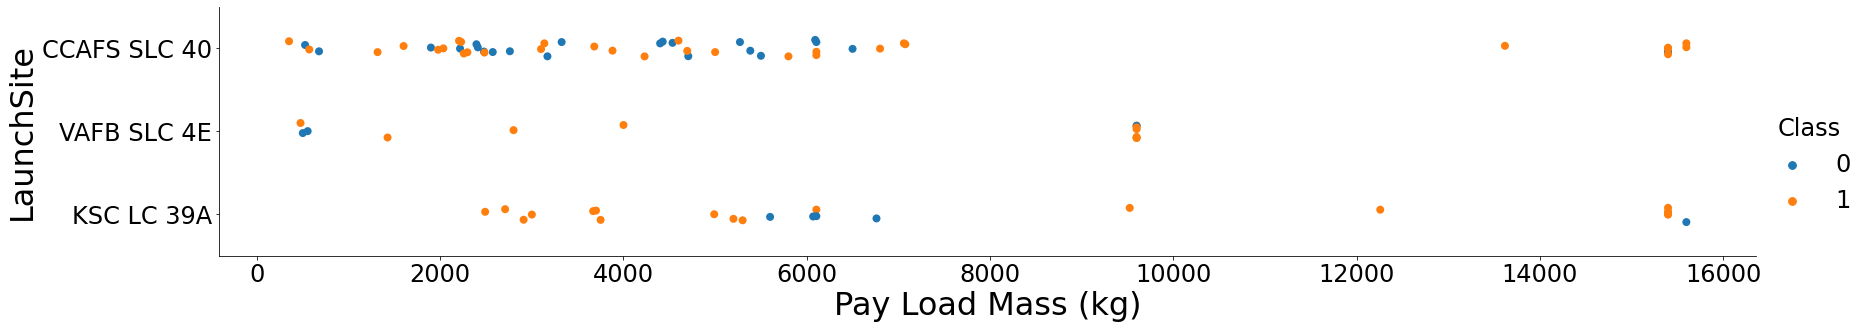

In [20]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
plt.rcParams.update({'font.size': 24})
plt.rcParams.update({'lines.markersize': 12})
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 5, s=8)
plt.xlabel("Pay Load Mass (kg)",fontsize=32)
plt.ylabel("LaunchSite",fontsize=32)
plt.show()

* ### Observe Payload Vs. Launch Site scatter point chart. You will find for the VAFB-SLC  launch site there are no  rockets  launched for  heavy payload mass(greater than 10000).
* ### This is likely due to its location, being further away from NASA and other major areas


Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


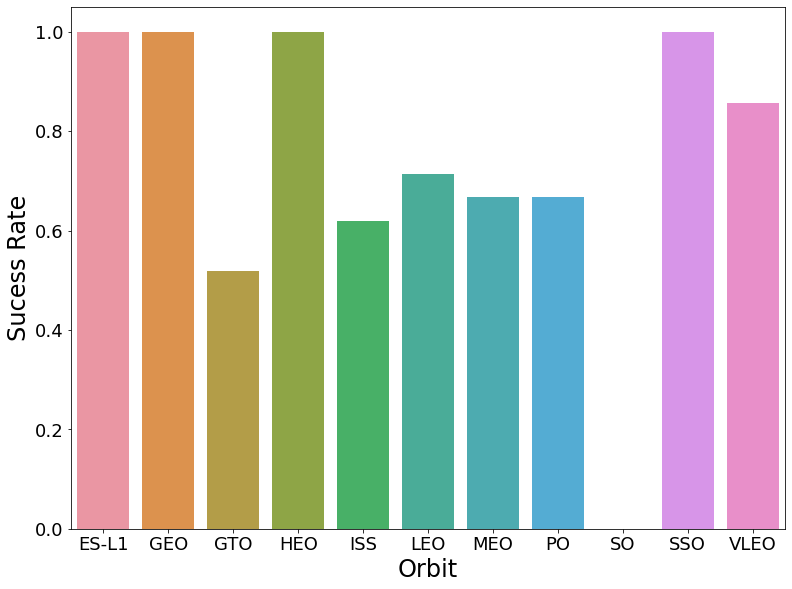

In [21]:
# HINT use groupby method on Orbit column and get the mean of Class column
orbit = df.groupby('Orbit').mean()['Class']
plt.figure(figsize=(12.8, 9.6))
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'lines.markersize': 10})
sns.barplot(y=orbit, x=orbit.index, data=df)
plt.xlabel("Orbit",fontsize=24)
plt.ylabel("Sucess Rate",fontsize=24)
plt.show()


* ### As can be seen in the Bar Chart. The SO orbit has a very low success rate, followed by the GTO and ISS.
* ### Where as the ES-L1, GEO, HEO and SSO all have a very high success rate.

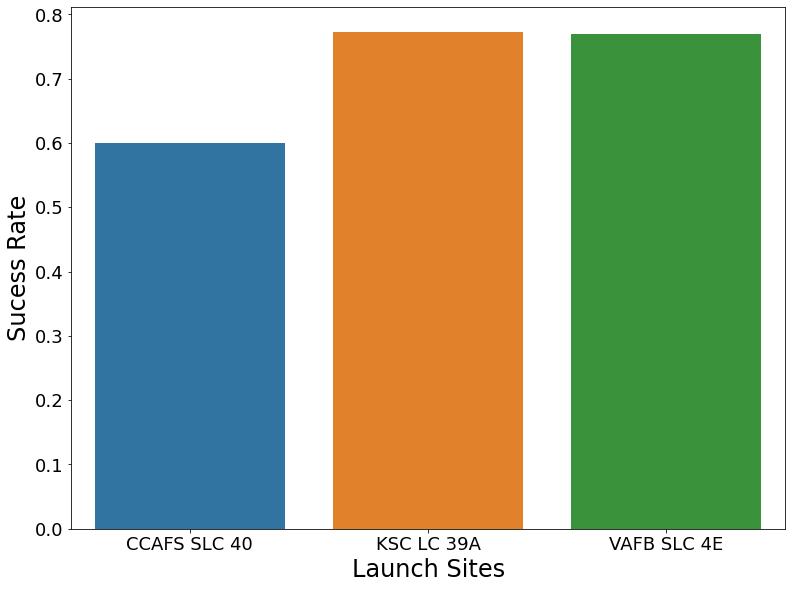

In [22]:
sites = df.groupby('LaunchSite').mean()['Class']
plt.figure(figsize=(12.8, 9.6))
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'lines.markersize': 10})
sns.barplot(y=sites, x=sites.index, data=df)
plt.xlabel("Launch Sites",fontsize=24)
plt.ylabel("Sucess Rate",fontsize=24)
plt.show()

Analyze the ploted bar chart try to find which orbits have high sucess rate.


### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


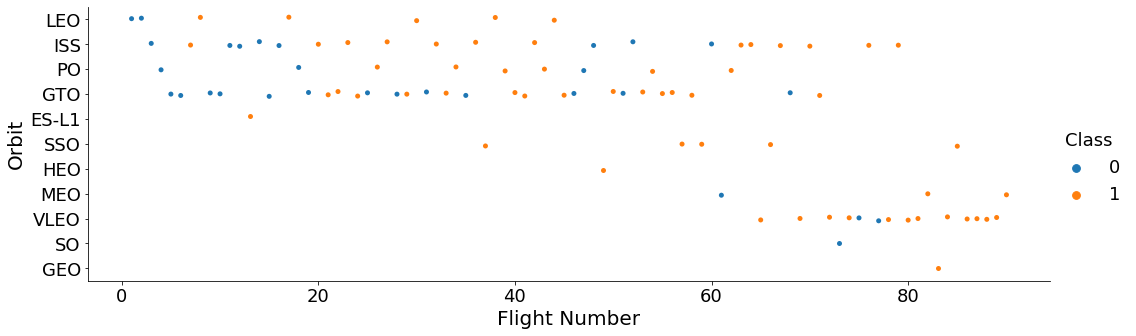

In [32]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 3)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

* ### As can be seen with the LEO orbit, the Success appears related to the number of flights
* ### There seems to be no relationship between flight number when in GTO orbit.
* ### The ES-L1, SSO and HEO, while have a high success rate where only trialed a few times and so there is not enough data to draw conclusions here.


You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### TASK  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


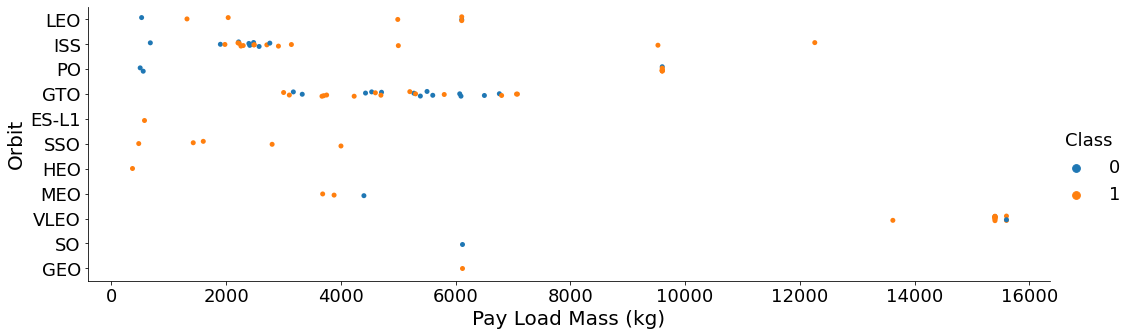

In [35]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 3)
plt.xlabel("Pay Load Mass (kg)",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

* ### With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.
* ### However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [25]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
    

In [26]:
year_dict={}
year_dict['2010']=[0,0]
count=0
for i in range(0,len(year)):
    if year[i] == '2010':
        count=count+1
        year_dict['2010']=[year_dict['2010'][0]+df['Class'][i], count]
year_dict['2012']=[0,0]
count=0
for i in range(0,len(year)):
    if year[i] == '2012':
        count=count+1
        year_dict['2012']=[year_dict['2012'][0]+df['Class'][i], count]
year_dict['2013']=[0,0]
count=0
for i in range(0,len(year)):
    if year[i] == '2013':
        count=count+1
        year_dict['2013']=[year_dict['2013'][0]+df['Class'][i],count]
year_dict['2014']=[0,0]
count=0
for i in range(0,len(year)):
    if year[i] == '2014':
        count=count+1
        year_dict['2014']=[year_dict['2014'][0]+df['Class'][i],count]
year_dict['2015']=[0,0]
count=0
for i in range(0,len(year)):
    if year[i] == '2015':
        count=count+1
        year_dict['2015']=[year_dict['2015'][0]+df['Class'][i],count]
year_dict['2016']=[0,0]
count=0
for i in range(0,len(year)):
    if year[i] == '2016':
        count=count+1
        year_dict['2016']=[year_dict['2016'][0]+df['Class'][i],count]
year_dict['2017']=[0,0]
count=0
for i in range(0,len(year)):
    if year[i] == '2017':
        count=count+1
        year_dict['2017']=[year_dict['2017'][0]+df['Class'][i],count]

year_dict['2018']=[0,0]
count=0
for i in range(0,len(year)):
    if year[i] == '2018':
        count=count+1
        year_dict['2018']=[year_dict['2018'][0]+df['Class'][i],count]

year_dict['2019']=[0,0]
count=0
for i in range(0,len(year)):
    if year[i] == '2019':
        count=count+1
        year_dict['2019']=[year_dict['2019'][0]+df['Class'][i],count]

year_dict['2020']=[0,0]
count=0
for i in range(0,len(year)):
    if year[i] == '2020':
        count=count+1
        year_dict['2020']=[year_dict['2020'][0]+df['Class'][i],count]
year_dict

{'2010': [0, 0],
 '2012': [0, 0],
 '2013': [0, 0],
 '2014': [0, 0],
 '2015': [0, 0],
 '2016': [0, 0],
 '2017': [0, 0],
 '2018': [0, 0],
 '2019': [0, 0],
 '2020': [0, 0]}

Text(0, 0.5, 'Success Rate for Each Year')

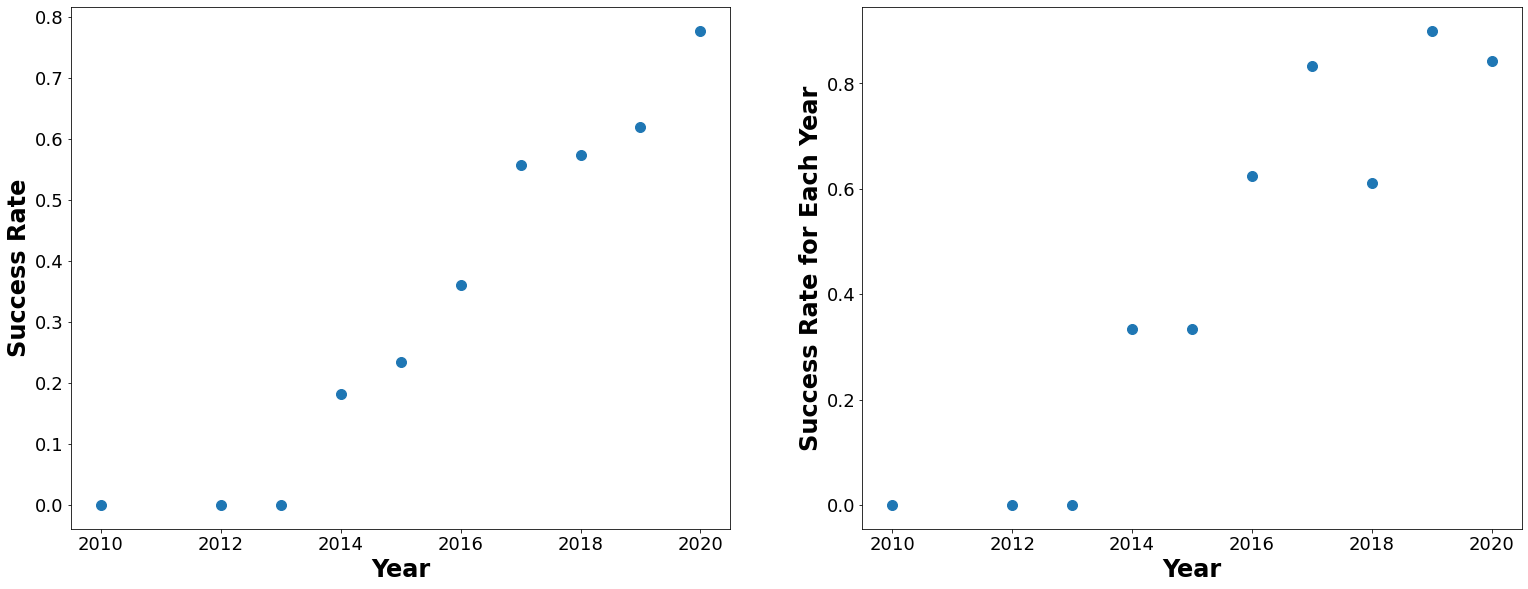

In [27]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
year = Extract_year(df)[0:90]
years=[2010,2012,2013,2014,2015,2016,2017,2018,2019,2020]
year_dict={}
ave=[0,0,0,(2/6),(2/6),(5/8),(15/18),(11/18),(9/10),(16/19)]
ave_total=[0,0,0,2/11,4/17,9/25,24/43,35/61,44/71,70/90]

plt.figure(figsize=(26, 9.6))
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'lines.markersize': 10})
plt.subplot(1, 2, 1)
plt.scatter(years,ave_total)
plt.xlabel('Year', fontweight='bold', fontsize=24 )
plt.ylabel('Success Rate',fontweight='bold', fontsize=24)

plt.subplot(1, 2, 2)
plt.scatter(years,ave)
plt.xlabel('Year', fontweight='bold', fontsize=24 )
plt.ylabel('Success Rate for Each Year',fontweight='bold', fontsize=24)

* ### You  can observe here that the success rate since 2013 kept increasing till 2020
* ### Note that 2018 was relatively a bad year, however most of these failures had low payload mass and were from the CCAFS launch site which as we show are parameters that can lead to mission failure.

you can observe that the sucess rate since 2013 kept increasing till 2020


## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [28]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [29]:
# HINT: Use get_dummies() function on the categorical columns
dummy_orbit = pd.get_dummies(df['Orbit'])
dummy_LaunchSite = pd.get_dummies(df['LaunchSite'])
dummy_LandingPad = pd.get_dummies(df['LandingPad'])
dummy_Serial = pd.get_dummies(df['Serial'])
features_one_hot=[dummy_orbit, dummy_LaunchSite, dummy_LandingPad, dummy_Serial]
features_one_hot=pd.concat(features_one_hot, axis=1).reindex(df.index)
features_one_hot['Flights'] = df['Flights']
features_one_hot['GridFins'] = df['GridFins']
features_one_hot['Reused'] = df['Reused']
features_one_hot['Legs'] = df['Legs']
features_one_hot['PayloadMass'] = df['PayloadMass']
features_one_hot['FlightNumber'] = df['FlightNumber']
features_one_hot['Block'] = df['Block']
features_one_hot['ReusedCount'] = df['ReusedCount']
features_one_hot

,ES-L1,GEO,GTO,HEO,ISS,LEO,MEO,PO,SO,SSO,...,B1060,B1062,Flights,GridFins,Reused,Legs,PayloadMass,FlightNumber,Block,ReusedCount
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,False,False,False,6104.959412,1,1.0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,1,False,False,False,525.000000,2,1.0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,1,False,False,False,677.000000,3,1.0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,1,False,False,False,500.000000,4,1.0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,False,False,False,3170.000000,5,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0,0,0,0,0,0,0,0,0,0,...,1,0,2,True,True,True,15400.000000,86,5.0,2
86,0,0,0,0,0,0,0,0,0,0,...,0,0,3,True,True,True,15400.000000,87,5.0,2
87,0,0,0,0,0,0,0,0,0,0,...,0,0,6,True,True,True,15400.000000,88,5.0,5
88,0,0,0,0,0,0,0,0,0,0,...,1,0,3,True,True,True,15400.000000,89,5.0,2


### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [30]:
# HINT: use astype function
features_one_hot.astype(float)
features_one_hot

,ES-L1,GEO,GTO,HEO,ISS,LEO,MEO,PO,SO,SSO,...,B1060,B1062,Flights,GridFins,Reused,Legs,PayloadMass,FlightNumber,Block,ReusedCount
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,False,False,False,6104.959412,1,1.0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,1,False,False,False,525.000000,2,1.0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,1,False,False,False,677.000000,3,1.0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,1,False,False,False,500.000000,4,1.0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,False,False,False,3170.000000,5,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0,0,0,0,0,0,0,0,0,0,...,1,0,2,True,True,True,15400.000000,86,5.0,2
86,0,0,0,0,0,0,0,0,0,0,...,0,0,3,True,True,True,15400.000000,87,5.0,2
87,0,0,0,0,0,0,0,0,0,0,...,0,0,6,True,True,True,15400.000000,88,5.0,5
88,0,0,0,0,0,0,0,0,0,0,...,1,0,3,True,True,True,15400.000000,89,5.0,2


In [31]:
df.tail(47)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
43,44,2018-01-08,Falcon 9,6104.959412,LEO,CCAFS SLC 40,True RTLS,1,True,False,True,5e9e3032383ecb267a34e7c7,4.0,1,B1043,-80.577366,28.561857,1
44,45,2018-01-31,Falcon 9,4230.000000,GTO,CCAFS SLC 40,True Ocean,2,True,True,True,NaN,3.0,1,B1032,-80.577366,28.561857,1
45,46,2018-03-06,Falcon 9,6092.000000,GTO,CCAFS SLC 40,None None,1,True,False,True,NaN,4.0,0,B1044,-80.577366,28.561857,0
46,47,2018-03-30,Falcon 9,9600.000000,PO,VAFB SLC 4E,None None,2,True,True,True,NaN,4.0,1,B1041,-120.610829,34.632093,0
47,48,2018-04-02,Falcon 9,2760.000000,ISS,CCAFS SLC 40,None None,2,True,True,True,NaN,4.0,1,B1039,-80.577366,28.561857,0
48,49,2018-04-18,Falcon 9,350.000000,HEO,CCAFS SLC 40,True ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,4.0,1,B1045,-80.577366,28.561857,1
49,50,2018-05-11,Falcon 9,3750.000000,GTO,KSC LC 39A,True ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,5.0,3,B1046,-80.603956,28.608058,1
50,51,2018-06-04,Falcon 9,5383.850000,GTO,CCAFS SLC 40,None None,2,False,True,False,NaN,4.0,1,B1040,-80.577366,28.561857,0
51,52,2018-06-29,Falcon 9,2410.000000,ISS,CCAFS SLC 40,None None,2,False,True,False,NaN,4.0,1,B1045,-80.577366,28.561857,0
52,53,2018-07-22,Falcon 9,7076.000000,GTO,CCAFS SLC 40,True ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1047,-80.577366,28.561857,1


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


<a href="https://www.linkedin.com/in/nayefaboutayoun/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">Nayef Abou Tayoun</a> is a Data Scientist at IBM and pursuing a Master of Management in Artificial intelligence degree at Queen's University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By    | Change Description      |
| ----------------- | ------- | ------------- | ----------------------- |
| 2021-10-12        | 1.1     | Lakshmi Holla | Modified markdown       |
| 2020-09-20        | 1.0     | Joseph        | Modified Multiple Areas |
| 2020-11-10        | 1.1     | Nayef         | updating the input data |


Copyright © 2020 IBM Corporation. All rights reserved.
